In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import root_mean_squared_error as rmse

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import precision_recall_curve, auc

In [39]:
lst_of_datasets = ["train_bi/residential_buildings.csv", "train_bi/train_clients.csv","train_bi/train_consultation.csv", 
                       "train_bi/train_fb.csv", "train_bi/train_nps.csv", "train_bi/train_oktell.csv",
                       "train_bi/train_sales.csv", "train_bi/train_secondary_housing.csv","train_bi/train_serv.csv"]


def dataset_choice(k):
    
    PATH_TO_DATA = "C:/Users/anurj/Desktop/Journey to Greatness/DATATHON X BI/Case 1/"

    
    path_to_df = os.path.join(PATH_TO_DATA, lst_of_datasets[k])

    
    return path_to_df

In [40]:
#k is a number to choose for datasets
for index, dataset in enumerate(lst_of_datasets):
    print(f"{index} - {dataset}")

0 - train_bi/residential_buildings.csv
1 - train_bi/train_clients.csv
2 - train_bi/train_consultation.csv
3 - train_bi/train_fb.csv
4 - train_bi/train_nps.csv
5 - train_bi/train_oktell.csv
6 - train_bi/train_sales.csv
7 - train_bi/train_secondary_housing.csv
8 - train_bi/train_serv.csv


In [41]:
df = pd.read_csv(dataset_choice(1))
df_consultation = pd.read_csv(dataset_choice(2))
df_fb= pd.read_csv(dataset_choice(3))
df_nps = pd.read_csv(dataset_choice(4))
df_oktell= pd.read_csv(dataset_choice(5))
df_sales = pd.read_csv(dataset_choice(6))
df_secondary_housing = pd.read_csv(dataset_choice(7))
df_serv = pd.read_csv(dataset_choice(8))

C:\Users\anurj\AppData\Local\Temp\ipykernel_44356\1276648134.py:3: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fb= pd.read_csv(dataset_choice(3))


In [42]:
df.shape[0] + df_consultation.shape[0] + df_fb.shape[0] + df_nps.shape[0]+ df_oktell.shape[0] + df_sales.shape[0]+ df_secondary_housing.shape[0]+ df_serv.shape[0]


2958288

In [43]:
df_secondary_housing["client_id"] = df_secondary_housing['PHONENUMBER1']
df_secondary_housing.drop(columns=['PHONENUMBER1'], axis=1)
df_secondary_housing

,CITY,DISTRICT,Complex ID,YEARBUILT,PROPERTYCLASS,WALLTYPE,SELLPRICE,AREA,DTCREATE,DTCLOSE,...,PHONENUMBER4,PHONENUMBER5,PHONENUMBER6,PHONENUMBER7,PHONENUMBER8,PHONENUMBER9,PHONENUMBER10,PHONENUMBER11,PHONENUMBER12,client_id
0,Астана,Алматинский,19.0,2016.0,NaN,Кирпичные,23500000,59.0,09.10.2013,2023-08-03 00:00:00,...,70060e11ff9d975ebba0960a128d88fa1869ee07ecbb18...,d5633747555fd15986366b1abd29589bf2dc873232734d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0ac2cf51bd8c23397d97e63ad6e6c3ad18e10d2454c449...
1,Астана,Алматинский,131.0,2018.0,NaN,Монолитные,18500000,43.0,02.04.2019,2023-07-31 00:00:00,...,a5795afe689903d94ed2de900d661736390edbf9a9ea3d...,8d4b629b1d2f07d166dd72a4a9a2a16504058c28d81e46...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ba25cb9b1f75101d3a575e6ff6d7506678418eb362b919...
2,Актау,NaN,70.0,2017.0,Комфорт,Монолитные,60000000,76.0,30.03.2022,2023-01-25 00:00:00,...,b04b0e3f982fc8d6305ca5d4c6987606d0e157737ea951...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40de414c8d4409f8206b0acc618929586bc2ad9a19b879...
3,Астана,Есильский,9.0,2022.0,Комфорт,Кирпичные,39900000,70.0,03.02.2022,2023-01-26 00:00:00,...,d99e48c0080f14fb9ebef54c272b04373e8466ef46cba4...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,baf3d84ba9deb682461652ec16c6677ad627464d47a6a0...
4,Астана,Алматинский,19.0,2010.0,NaN,NaN,27500000,76.0,04.03.2017,2023-08-11 00:00:00,...,55e23dcfae6ede08c3669046fa49f1de001c98a62563ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cb6fa0ea4ff313998f7a79dee75a7b105d4b78d4ebb625...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30896,Астана,Есильский,43.0,2023.0,Комфорт,NaN,31500000,68.0,01.03.2023,2023-04-02 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d87cd878a0c1b170f20ddc8d140bfaf0dcc88cc7a6f52b...
30897,Астана,Алматинский,155.0,NaN,Эконом,Монолитные,22000000,55.0,18.03.2023,2023-12-03 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2a2f2d6dfa581433e494bfb801e671f5d67bc7ad614e55...
30898,Астана,Алматинский,126.0,2010.0,NaN,Кирпичные,11000000,30.0,2021-04-01 18:10:12,2021-05-14 14:53:33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2a2f2d6dfa581433e494bfb801e671f5d67bc7ad614e55...
30899,Астана,Есильский,28.0,2017.0,Бизнес,Монолитные,40000000,60.0,2021-01-21 13:09:49,2021-05-12 08:19:13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7dc0698c2ce1a213920d4aefe7f2cef7b1a30b09d19f8a...


In [44]:
df.Gender.unique()
#Which of them has cliend_id?
#everything except 0

array([nan, 'Female', 'Male'], dtype=object)

In [45]:
import pandas as pd

def make_data_pairs(df, data_chosen):
    # Ensure 'client_id' is treated as a string in the main DataFrame
    if 'client_id' in df.columns:
        df['client_id'] = df['client_id'].astype(str)
    else:
        raise KeyError("client_id column not found in the first dataset.")
    
    # Strip whitespace from columns of the second DataFrame
    data_chosen.columns = data_chosen.columns.str.strip()
    
    # Ensure 'client_id' is treated as a string in the chosen dataset
    if 'client_id' in data_chosen.columns:
        data_chosen['client_id'] = data_chosen['client_id'].astype(str)  # Convert to string
        
        # Drop duplicates in data_chosen based on client_id
        data_chosen_unique = data_chosen.drop_duplicates(subset='client_id')
        
        # Merge with suffixes for duplicate columns
        merged_df = pd.merge(df, data_chosen_unique, on='client_id', how='left', suffixes=('', '_dup'))
        
        # Drop duplicate 'client_id' columns if they exist
        merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
    else:
        print(f"Warning: 'client_id' column not found in {data_chosen}. Skipping this dataset.")
        merged_df = df  # Return the original DataFrame if there is no match

    return merged_df

In [60]:
df.shape

(759507, 4)

In [46]:
mrg_df = make_data_pairs(df, df_consultation)
mrg_df = make_data_pairs(mrg_df, df_fb)
print(mrg_df)

                                                client_id  Gender  \
0       1e2cadafed32a71613600e4e225aa7d2391409e9c3b988...     NaN   
1       613c4295a6ad1cf9cbc021e7ce72d04bc9e22c8d03f8f6...  Female   
2       fc147bcc9c288c7aee158c171b3f2b2a252a69366675eb...     NaN   
3       9e8e372399cecb24571032a9652a3a77335be37e2efa3c...     NaN   
4       0548969e4e72a3b378bbf0b2faf60eeffdff5a149e0bdc...  Female   
...                                                   ...     ...   
759502  f0fcefe7a29e6c5df0ebfb2cc4a3785d7a51f5ddee1d4f...     NaN   
759503  6ccab425ae29003f137aec7f64b3f9148be8c72d0e115c...  Female   
759504  ec12cbfe667554f5fec4c8aa5554a8b2f5b60394e6c1a0...  Female   
759505  6b992c77878ad96f75034052c21f656de640ef7689e728...  Female   
759506  9bd8e47c647cba6a9e92995c8e4b3c689c942bb0312021...     NaN   

       SourceSystem  Target          start_timestamp            end_timestamp  \
0          CRMSales       0                      NaN                      NaN   
1        

In [47]:

mrg_df = make_data_pairs(mrg_df, df_nps)
mrg_df = make_data_pairs(mrg_df, df_oktell)
mrg_df = make_data_pairs(mrg_df, df_sales)
#mrg_df = make_data_pairs(mrg_df, df_secondary_housing)
mrg_df = make_data_pairs(mrg_df, df_serv)

In [48]:
mrg_df

,client_id,Gender,SourceSystem,Target,start_timestamp,end_timestamp,duration_in_seconds,client_consultation_type,year_cl,url,...,Status,DataZayavki,year_zay,FinPloshchad,Cost,ProcentVznosa_Dolevoe,TipKarty,Дата создания заявки,Дата закрытия заявки,Категория заявки
0,1e2cadafed32a71613600e4e225aa7d2391409e9c3b988...,NaN,CRMSales,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,613c4295a6ad1cf9cbc021e7ce72d04bc9e22c8d03f8f6...,Female,OneC,0,2020-02-12 18:09:32.000,2020-02-12 18:25:28.000,956.0,Звонок в КЦ,2020.0,NaN,...,Долевое участие,2021-04-23,2021.0,0.771474,0.553735,100,BI Bronze,NaN,NaN,NaN
2,fc147bcc9c288c7aee158c171b3f2b2a252a69366675eb...,NaN,CRMSales,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9e8e372399cecb24571032a9652a3a77335be37e2efa3c...,NaN,Website,0,NaN,NaN,NaN,NaN,NaN,https://bi.group/ru/promotion/super-ipoteka%3F...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0548969e4e72a3b378bbf0b2faf60eeffdff5a149e0bdc...,Female,CRMSales,0,NaN,NaN,NaN,NaN,NaN,kz_bi_group_444_onay_ipoteka_altyn_bank_shymke...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759502,f0fcefe7a29e6c5df0ebfb2cc4a3785d7a51f5ddee1d4f...,NaN,RBD,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759503,6ccab425ae29003f137aec7f64b3f9148be8c72d0e115c...,Female,OneC,0,2021-05-02 17:55:41.000,2021-05-02 17:56:35.000,53.0,Встреча в ОП,2021.0,kz_bi_group_222_presidents_park_reels_dance|_f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-25,2023-03-11,Мелкий ремонт
759504,ec12cbfe667554f5fec4c8aa5554a8b2f5b60394e6c1a0...,Female,OneC,1,2022-12-15 14:38:28.000,2022-12-15 14:53:05.000,608.0,Встреча в ОП,2022.0,NaN,...,Ипотека,2021-10-10,2021.0,0.876010,0.743198,0,BI Bronze,2023-12-10,2023-12-10,Сантехника и коммуникации
759505,6b992c77878ad96f75034052c21f656de640ef7689e728...,Female,Website,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
mrg_df.Target.value_counts()


Target
0    731571
1     27936
Name: count, dtype: int64

In [116]:
731571/(731571+27936)

0.9632182455197912

In [28]:
6576943+3363124

9940067

In [ ]:
#189877 THIS IS NUMBER WE NEED

In [17]:
mrg_df.columns

Index(['client_id', 'Gender', 'SourceSystem', 'Target', 'start_timestamp',
       'end_timestamp', 'duration_in_seconds', 'client_consultation_type',
       'year_cl', 'url', 'site_application_type', 'create_timestamp',
       'region_name', 'first_click_url', 'advertising_campaign', 'year_cr',
       'Дата', 'ЖК', 'Оценка', 'Статус', 'Комментарий', 'call_start_timestamp',
       'call_end_timestamp', 'oktell_task_name', 'source_phone_number',
       'year_call', 'ЖК_dup', 'Status', 'DataZayavki', 'year_zay',
       'FinPloshchad', 'Cost', 'ProcentVznosa_Dolevoe', 'TipKarty',
       'Дата создания заявки', 'Дата закрытия заявки', 'Категория заявки'],
      dtype='object')

In [49]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import time

imputer = SimpleImputer(strategy='most_frequent')
le = LabelEncoder()

# Handle categorical features
categorical_features = mrg_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    mrg_df[col] = le.fit_transform(mrg_df[col])

# Define features and target variable
X = mrg_df[['client_id', 'Gender', 'SourceSystem', 'start_timestamp',
       'end_timestamp', 'duration_in_seconds', 'client_consultation_type',
       'year_cl', 'url', 'site_application_type', 'create_timestamp',
       'region_name', 'first_click_url', 'advertising_campaign', 'year_cr',
       'Дата', 'ЖК', 'Оценка', 'Статус', 'Комментарий', 'call_start_timestamp',
       'call_end_timestamp', 'oktell_task_name', 'source_phone_number',
       'year_call', 'ЖК_dup', 'Status', 'DataZayavki', 'year_zay',
       'FinPloshchad', 'Cost', 'ProcentVznosa_Dolevoe', 'TipKarty',
       'Дата создания заявки', 'Дата закрытия заявки', 'Категория заявки']]
y = mrg_df['Target']  # Use a Series instead of DataFrame for y

# Initialize CatBoost model
md_cat_boost = CatBoostClassifier(verbose=0, random_state=2, n_estimators=100, depth=2)

# Split the data into training and hold-out sets
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
time_start = time.time()
md_cat_boost.fit(X_train, y_train)


# Make predictions
predictions_train = md_cat_boost.predict(X_train)
predictions_hold = md_cat_boost.predict(X_hold)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, predictions_train)
accuracy_hold = accuracy_score(y_hold, predictions_hold)
results_md_cat = {
    "train": accuracy_train,
    "test": accuracy_hold
}
print(results_md_cat)

{'train': 0.9740150549041294, 'test': 0.9732985740806572}


In [50]:
lst_of_datasets_test = ["test_bi/residential_buildings.csv", "test_bi/test_clients.csv","test_bi/test_consultation.csv", 
                       "test_bi/test_fb.csv", "test_bi/test_nps.csv", "test_bi/test_oktell.csv",
                       "test_bi/test_sales.csv", "test_bi/test_secondary_housing.csv","test_bi/test_serv.csv"]


def dataset_choice_test(k):
    
    PATH_TO_DATA = "C:/Users/anurj/Desktop/Journey to Greatness/DATATHON X BI/Case 1/"

    
    path_to_df = os.path.join(PATH_TO_DATA, lst_of_datasets_test[k])

    
    return path_to_df


df_test = pd.read_csv(dataset_choice_test(1))
df_consultation_test = pd.read_csv(dataset_choice_test(2))
df_fb_test= pd.read_csv(dataset_choice_test(3))
df_nps_test = pd.read_csv(dataset_choice_test(4))
df_oktell_test= pd.read_csv(dataset_choice_test(5))
df_sales_test = pd.read_csv(dataset_choice_test(6))
df_secondary_housing_test = pd.read_csv(dataset_choice_test(7))
df_serv_test = pd.read_csv(dataset_choice_test(8))

In [51]:
mrg_df_test = make_data_pairs(df_test, df_consultation_test)
mrg_df_test = make_data_pairs(mrg_df_test, df_fb_test)
mrg_df_test = make_data_pairs(mrg_df_test, df_nps_test)
mrg_df_test = make_data_pairs(mrg_df_test, df_oktell_test)
mrg_df_test = make_data_pairs(mrg_df_test, df_sales_test)
mrg_df_test = make_data_pairs(mrg_df_test, df_serv_test)

In [52]:
mrg_df

,client_id,Gender,SourceSystem,Target,start_timestamp,end_timestamp,duration_in_seconds,client_consultation_type,year_cl,url,...,Status,DataZayavki,year_zay,FinPloshchad,Cost,ProcentVznosa_Dolevoe,TipKarty,Дата создания заявки,Дата закрытия заявки,Категория заявки
0,89338,2,3,0,166943,166952,NaN,3,NaN,23289,...,3,1425,NaN,NaN,NaN,266,14,1460,1617,28
1,287389,0,7,0,3608,3609,956.0,1,2020.0,23289,...,1,465,2021.0,0.771474,0.553735,28,0,1460,1617,28
2,747859,2,3,0,166943,166952,NaN,3,NaN,23289,...,3,1425,NaN,NaN,NaN,266,14,1460,1617,28
3,470045,2,10,0,166943,166952,NaN,3,NaN,14287,...,3,1425,NaN,NaN,NaN,266,14,1460,1617,28
4,15617,0,3,0,166943,166952,NaN,3,NaN,22254,...,3,1425,NaN,NaN,NaN,266,14,1460,1617,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759502,715048,2,9,1,166943,166952,NaN,3,NaN,23289,...,3,1425,NaN,NaN,NaN,266,14,1460,1617,28
759503,321603,0,7,0,58920,58935,53.0,0,2021.0,22167,...,3,1425,NaN,NaN,NaN,266,14,1150,1163,16
759504,700486,0,7,1,108647,108662,608.0,0,2022.0,23289,...,2,634,2021.0,0.876010,0.743198,0,0,1438,1437,23
759505,318005,0,10,0,166943,166952,NaN,3,NaN,23289,...,3,1425,NaN,NaN,NaN,266,14,1460,1617,28


In [53]:
mrg_df_test


,client_id,Gender,SourceSystem,Target,start_timestamp,end_timestamp,duration_in_seconds,client_consultation_type,year_cl,url,...,Status,DataZayavki,year_zay,FinPloshchad,Cost,ProcentVznosa_Dolevoe,TipKarty,Дата создания заявки,Дата закрытия заявки,Категория заявки
0,4da201be4db4b213887072653c8b385637686e55db8d0b...,Female,OneC,0,2020-04-05 11:59:34.000,2020-04-05 12:01:40.000,126.0,Звонок в КЦ,2020.0,NaN,...,Долевое участие,2023-03-15,2023.0,0.493141,0.4002,30,BI Platinum,NaN,NaN,NaN
1,40d8b4cc8bbc91fd3619a7722529a9de1d5806292f4ea2...,NaN,CRMSales,0,NaN,NaN,NaN,NaN,NaN,KrishaSezimqala,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23046d1cc224a51ecea23c1d69e1d8618dcf8337b0929d...,NaN,CRMSales,0,NaN,NaN,NaN,NaN,NaN,kz_bi_group_777_greenline_flora2_tizer_|_fbads...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9669c3e6f7d0671d8ad5cd94d2f2304a97ee5b4582becf...,NaN,CRMSales,0,NaN,NaN,NaN,NaN,NaN,kz_bi_group_arena_park_kuda_vse_edut|_almaty_s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d47fc3cd55828e82f0c7b0f27634c3d4bdb0131ce708ae...,NaN,CRMSales,0,NaN,NaN,NaN,NaN,NaN,kz_bi_group_555_altyn_zaman_tizer_december_lea...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189872,70b1cdbc205fb4002538fb05e681d1d34b486e8e491bb7...,NaN,CRMSales,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189873,be44537a183c0962535a37d696c570fd304d916c9e0993...,Male,BIGApp,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-20,2022-05-24,Электрика
189874,11ebe6d92bc035fe2271f5fee4b9469aa95bfdf3f38496...,NaN,Website,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189875,8a5d89505b24741a5747a7d4f07199c76be8ddc72cb2ad...,Male,OneC,0,2020-06-15 10:34:52.000,2020-06-15 10:36:16.000,84.0,Звонок в КЦ,2020.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-20,2024-05-04,NPS


In [54]:
def write_to_submission_file(predicted_labels, client_ids, out_file, target='target', index_label="client_id"):
    predicted_df = pd.DataFrame(predicted_labels, index=client_ids, columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)


# Call the function to write predictions to a file
# write_to_submission_file(predictions_hold, 'submission_1.csv', target='Target', index_label='client_id')

#Submission_1_cat_boost_every_feature

In [55]:
#Predictions_1
categorical_features = mrg_df_test.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    mrg_df_test[col] = le.fit_transform(mrg_df_test[col])

# Define features and target variable
X_cat = mrg_df_test[categorical_features]
predictions_1 = md_cat_boost.predict(X_cat)
print(predictions_1)

CatBoostError: catboost/libs/data/model_dataset_compatibility.cpp:81: At position 5 should be feature with name duration_in_seconds (found client_consultation_type).

In [24]:

write_to_submission_file(predictions_1, df_test['client_id'], 'submission_1.csv', target='Target', index_label='client_id')

NameError: name 'predictions_1' is not defined

In [25]:
res = pd.read_csv('submission_1.csv')
res.head()

,client_id,Target
0,4da201be4db4b213887072653c8b385637686e55db8d0b...,1
1,40d8b4cc8bbc91fd3619a7722529a9de1d5806292f4ea2...,0
2,23046d1cc224a51ecea23c1d69e1d8618dcf8337b0929d...,0
3,9669c3e6f7d0671d8ad5cd94d2f2304a97ee5b4582becf...,0
4,d47fc3cd55828e82f0c7b0f27634c3d4bdb0131ce708ae...,0


In [56]:
#Submission_2
categorical_features = mrg_df_test.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    mrg_df_test[col] = le.fit_transform(mrg_df_test[col])

# Define features and target variable
X_cat = mrg_df_test[['client_id', 'Gender', 'SourceSystem', 'start_timestamp',
       'end_timestamp', 'duration_in_seconds', 'client_consultation_type',
       'year_cl', 'url', 'site_application_type', 'create_timestamp',
       'region_name', 'first_click_url', 'advertising_campaign', 'year_cr',
       'Дата', 'ЖК', 'Оценка', 'Статус', 'Комментарий', 'call_start_timestamp',
       'call_end_timestamp', 'oktell_task_name', 'source_phone_number',
       'year_call', 'ЖК_dup', 'Status', 'DataZayavki', 'year_zay',
       'FinPloshchad', 'Cost', 'ProcentVznosa_Dolevoe', 'TipKarty',
       'Дата создания заявки', 'Дата закрытия заявки', 'Категория заявки']]
predictions_2 = md_cat_boost.predict(X_cat)
print(predictions_2)

[1 0 0 ... 0 0 0]


In [57]:
write_to_submission_file(predictions_2, df_test["client_id"], 'submission_2.csv', target='Target', index_label='client_id')

In [28]:
feature_importances = md_cat_boost.get_feature_importance()
feature_names = X_train.columns  # Assuming X_train is a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
extracted_feat = importance_df[importance_df['Importance']>2]['Feature']
extracted_feat_lst = extracted_feat.to_list()
extracted_feat_lst
importance_df

,Feature,Importance
2,SourceSystem,69.521294
34,Дата закрытия заявки,13.451051
1,Gender,4.768332
20,call_start_timestamp,2.591840
4,end_timestamp,2.194942
27,DataZayavki,1.170599
7,year_cl,1.164296
33,Дата создания заявки,1.045059
28,year_zay,0.825849
23,source_phone_number,0.793059


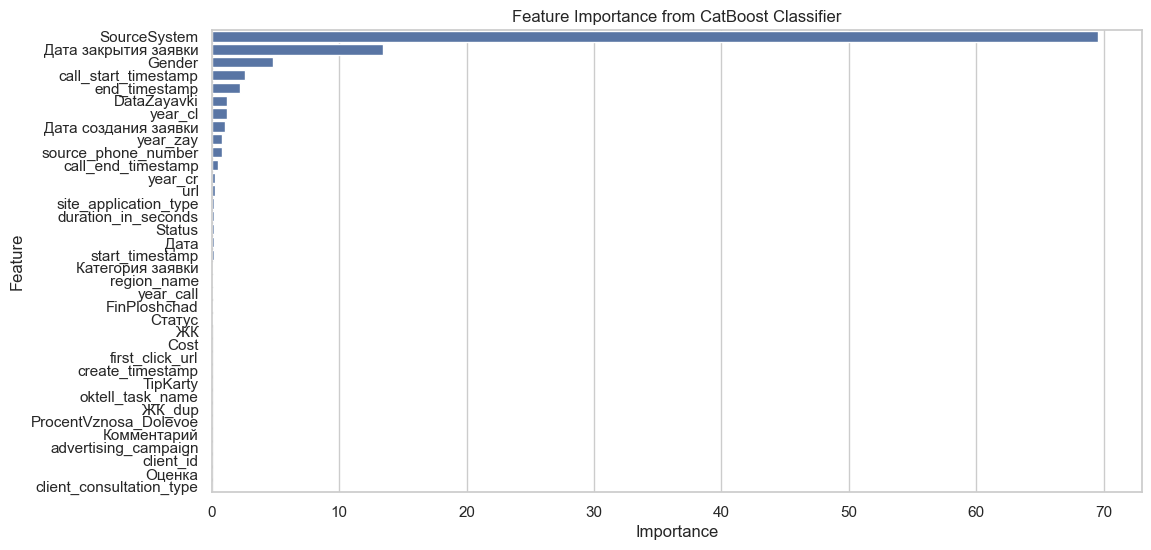

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from CatBoost Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [59]:
mrg_df.columns

Index(['client_id', 'Gender', 'SourceSystem', 'Target', 'start_timestamp',
       'end_timestamp', 'duration_in_seconds', 'client_consultation_type',
       'year_cl', 'url', 'site_application_type', 'create_timestamp',
       'region_name', 'first_click_url', 'advertising_campaign', 'year_cr',
       'Дата', 'ЖК', 'Оценка', 'Статус', 'Комментарий', 'call_start_timestamp',
       'call_end_timestamp', 'oktell_task_name', 'source_phone_number',
       'year_call', 'ЖК_dup', 'Status', 'DataZayavki', 'year_zay',
       'FinPloshchad', 'Cost', 'ProcentVznosa_Dolevoe', 'TipKarty',
       'Дата создания заявки', 'Дата закрытия заявки', 'Категория заявки'],
      dtype='object')

In [60]:
#Submission 3
#md_new
md_cat_boost_1 = CatBoostClassifier(verbose=0, random_state=2, n_estimators=100, depth=2)
md_cat_boost_1.fit(X, y)
predictions_3 = md_cat_boost_1.predict(X_cat)
write_to_submission_file(predictions_3, df_test["client_id"], 'submission_3.csv', target='Target', index_label='client_id')

In [32]:
X.columns

Index(['client_id', 'Gender', 'SourceSystem', 'start_timestamp',
       'end_timestamp', 'duration_in_seconds', 'client_consultation_type',
       'year_cl', 'url', 'site_application_type', 'create_timestamp',
       'region_name', 'first_click_url', 'advertising_campaign', 'year_cr',
       'Дата', 'ЖК', 'Оценка', 'Статус', 'Комментарий', 'call_start_timestamp',
       'call_end_timestamp', 'oktell_task_name', 'source_phone_number',
       'year_call', 'ЖК_dup', 'Status', 'DataZayavki', 'year_zay',
       'FinPloshchad', 'Cost', 'ProcentVznosa_Dolevoe', 'TipKarty',
       'Дата создания заявки', 'Дата закрытия заявки', 'Категория заявки'],
      dtype='object')

In [61]:
#Submission 4 (extracted features)
X_extracted = mrg_df[extracted_feat_lst]
md_cat_boost_1.fit(X_extracted, y)
X_extracted_test = mrg_df_test[extracted_feat_lst]
predictions_4 = md_cat_boost_1.predict(X_extracted_test)
write_to_submission_file(predictions_4, df_test["client_id"], 'submission_4.csv', target='Target', index_label='client_id')

In [62]:
X_extracted.columns

Index(['SourceSystem', 'Дата закрытия заявки', 'Gender',
       'call_start_timestamp', 'end_timestamp'],
      dtype='object')

In [63]:
from sklearn.model_selection import RandomizedSearchCV
md_cat_boost_2 = CatBoostClassifier(verbose=0, random_state=2)

# Define the hyperparameter grid
param_distributions = {
    'iterations': [100, 200, 500],
    'depth': [2, 4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.5],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0, 0.5, 1, 2]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=md_cat_boost_2,
    param_distributions=param_distributions,
    n_iter=20,  # Number of iterations for random search
    scoring='average_precision',  # Change as needed (e.g., 'f1', 'roc_auc')
    cv=3,  # Number of cross-validation folds
    verbose=1,
    random_state=2
)

# Fit RandomizedSearchCV
random_search.fit(X_extracted, y)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

In [64]:
#Submission 5
md_cat_boost_3 = CatBoostClassifier(verbose=0, random_state=2, learning_rate= 0.1, l2_leaf_reg = 1, iterations = 100, depth = 8, bagging_temperature = 0)
md_cat_boost_3.fit(X_extracted, y)
predictions_5 = md_cat_boost_3.predict(X_extracted_test)
write_to_submission_file(predictions_5, df_test["client_id"], 'submission_5.csv', target='Target', index_label='client_id')

In [65]:
#Submission 6
importance_df = importance_df.sort_values(by='Importance', ascending=False)
extracted_feat_2 = importance_df[importance_df['Importance']>2.5]['Feature']
extracted_feat_lst_1 = extracted_feat_2.to_list()
print(extracted_feat_lst_1)

X_extracted_2 = mrg_df[extracted_feat_lst_1]
X_extracted_test_2 = mrg_df_test[extracted_feat_lst_1]

['SourceSystem', 'Дата закрытия заявки', 'Gender', 'call_start_timestamp']


In [66]:
md_cat_boost_4 = CatBoostClassifier(verbose=0, random_state=2, learning_rate= 0.1, l2_leaf_reg = 1, iterations = 100, depth = 8, bagging_temperature = 0)
md_cat_boost_4.fit(X_extracted_2, y)
predictions_6 = md_cat_boost_4.predict(X_extracted_test_2)
write_to_submission_file(predictions_6, df_test["client_id"], 'submission_6.csv', target='Target', index_label='client_id')

In [67]:
#Submission 7
X_extracted_3 = mrg_df[['SourceSystem', 'Категория заявки', 'year_call', 'oktell_task_name',
                         'Gender', 'client_consultation_type', 'duration_in_seconds', 'year_cl', 'region_name' ]]
X_extracted_3_test = mrg_df_test[['SourceSystem', 'Категория заявки', 'year_call', 'oktell_task_name',
                         'Gender', 'client_consultation_type', 'duration_in_seconds', 'year_cl', 'region_name' ]]
md_cat_boost_4.fit(X_extracted_3, y)
predictions_7 = md_cat_boost_4.predict(X_extracted_3_test)
write_to_submission_file(predictions_7, df_test["client_id"], 'submission_7.csv', target='Target', index_label='client_id')

In [68]:
X_extracted_3.describe()

,SourceSystem,Категория заявки,year_call,oktell_task_name,Gender,client_consultation_type,duration_in_seconds,year_cl,region_name
count,759507.000000,759507.000000,310146.000000,759507.000000,759507.000000,759507.000000,167305.000000,167305.000000,759507.000000
mean,4.375696,26.824768,2022.249818,104.204267,1.402950,2.477298,626.008003,2021.574478,4.617682
std,3.020361,4.566678,0.780686,58.646529,0.835193,1.048161,4770.564104,1.214970,1.025813
min,0.000000,0.000000,2021.000000,0.000000,0.000000,0.000000,-2527.000000,2020.000000,0.000000
25%,3.000000,28.000000,2022.000000,29.000000,1.000000,3.000000,69.000000,2020.000000,5.000000
50%,3.000000,28.000000,2022.000000,148.000000,2.000000,3.000000,290.000000,2022.000000,5.000000
75%,7.000000,28.000000,2023.000000,148.000000,2.000000,3.000000,823.000000,2023.000000,5.000000
max,10.000000,28.000000,2023.000000,148.000000,2.000000,3.000000,805692.000000,2023.000000,5.000000


In [69]:
df

,client_id,Gender,SourceSystem,Target
0,1e2cadafed32a71613600e4e225aa7d2391409e9c3b988...,NaN,CRMSales,0
1,613c4295a6ad1cf9cbc021e7ce72d04bc9e22c8d03f8f6...,Female,OneC,0
2,fc147bcc9c288c7aee158c171b3f2b2a252a69366675eb...,NaN,CRMSales,0
3,9e8e372399cecb24571032a9652a3a77335be37e2efa3c...,NaN,Website,0
4,0548969e4e72a3b378bbf0b2faf60eeffdff5a149e0bdc...,Female,CRMSales,0
...,...,...,...,...
759502,f0fcefe7a29e6c5df0ebfb2cc4a3785d7a51f5ddee1d4f...,NaN,RBD,1
759503,6ccab425ae29003f137aec7f64b3f9148be8c72d0e115c...,Female,OneC,0
759504,ec12cbfe667554f5fec4c8aa5554a8b2f5b60394e6c1a0...,Female,OneC,1
759505,6b992c77878ad96f75034052c21f656de640ef7689e728...,Female,Website,0


In [70]:
#Submission 8
X_extracted_4= mrg_df[['SourceSystem', 'Категория заявки', 'year_call', 'oktell_task_name',
                         'Gender' ]]
X_extracted_4_test = mrg_df_test[['SourceSystem', 'Категория заявки', 'year_call', 'oktell_task_name',
                         'Gender' ]]
md_cat_boost_4.fit(X_extracted_4, y)
predictions_8 = md_cat_boost_4.predict(X_extracted_4_test)
write_to_submission_file(predictions_8, df_test["client_id"], 'submission_8.csv', target='Target', index_label='client_id')

In [76]:
X_extracted_4.drop(columns=['SourceSystem'], axis=1, inplace=True)
X_extracted_4

KeyError: "['SourceSystem'] not found in axis"

In [77]:
#Submission 8 without SourceSystem

X_train, X_test, y_train, y_test = train_test_split(X_extracted_4,y,test_size=0.3, random_state=42)


In [79]:
from sklearn.metrics import precision_recall_curve, auc, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_extracted_4, y, test_size=0.3, random_state=42)

# Fit the model
md_cat_boost_4.fit(X_train, y_train)

# Get predicted probabilities for the positive class
predictions_8_new = md_cat_boost_4.predict_proba(X_test)[:, 1]  # Select probability of the positive class


# 1. Calculate PR-AUC
precision, recall, _ = precision_recall_curve(y_test, predictions_8_new)
pr_auc = auc(recall, precision)

# Get predicted class labels for accuracy calculation
predicted_labels = md_cat_boost_4.predict(X_test)

# 2. Calculate Accuracy
accuracy = accuracy_score(y_test, predicted_labels)

print(f"PR-AUC: {pr_auc}")
print(f"Accuracy: {accuracy}")


PR-AUC: 0.15568635226340377
Accuracy: 0.9625635826607506


In [81]:
X_extracted_4_test.drop(columns=['SourceSystem'], axis=1, inplace=True)
X_extracted_4_test

C:\Users\anurj\AppData\Local\Temp\ipykernel_44356\1173394749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_extracted_4_test.drop(columns=['SourceSystem'], axis=1, inplace=True)


,Категория заявки,year_call,oktell_task_name,Gender
0,25,2021.0,11,0
1,25,2023.0,24,2
2,25,2023.0,24,2
3,25,2023.0,23,2
4,25,2022.0,22,2
...,...,...,...,...
189872,25,NaN,137,2
189873,24,NaN,137,1
189874,25,NaN,137,2
189875,0,NaN,137,1


In [82]:
predictions_9 = md_cat_boost_4.predict(X_extracted_4_test)
write_to_submission_file(predictions_9, df_test["client_id"], 'submission_9.csv', target='Target', index_label='client_id' )

Optuna


In [53]:
import optuna
from sklearn.metrics import average_precision_score

def objective(trial):
    # Suggest hyperparameters
    iterations = trial.suggest_int('iterations', 100, 1000)
    depth = trial.suggest_int('depth', 2, 10)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-2, 10.0)
    bagging_temperature = trial.suggest_float('bagging_temperature', 0, 5)

    X_train, X_hold, y_train, y_hold = train_test_split(X_extracted_2, y, test_size=0.3, random_state=42)



    # Create CatBoostClassifier with suggested parameters
    model = CatBoostClassifier(
        iterations=iterations,
        depth=depth,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        bagging_temperature=bagging_temperature,
        verbose=0,
        random_seed=42
    )

    # Fit the model
    model.fit(X_train, y_train)

    # Predict and calculate the PR AUC score
    y_pred = model.predict_proba(X_hold)[:, 1]
    score = average_precision_score(y_hold, y_pred)

    return score


In [54]:
# Create a study
study = optuna.create_study(direction='maximize')  # We want to maximize the PR AUC score

# Optimize the study
study.optimize(objective, n_trials=50)  # You can adjust the number of trials

# Print the best parameters and score
print("Best parameters:", study.best_params)
print("Best PR AUC score:", study.best_value)

[I 2024-10-13 12:36:55,395] A new study created in memory with name: no-name-5ea755ac-9171-47f2-be34-76c1c05ca0b6
C:\Users\anurj\AppData\Local\Temp\ipykernel_44744\24402233.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1)
[I 2024-10-13 12:37:33,800] Trial 0 finished with value: 0.5109594891922105 and parameters: {'iterations': 981, 'depth': 7, 'learning_rate': 1.6462746079090658e-05, 'l2_leaf_reg': 0.19286727959516678, 'bagging_temperature': 0.6629938139670888}. Best is trial 0 with value: 0.5109594891922105.
C:\Users\anurj\AppData\Local\Temp\ipykernel_44744\24402233.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log

KeyboardInterrupt: 

In [ ]:
X_extracted_

Ansemble

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier


In [58]:
X_extracted_2

,SourceSystem,Дата закрытия заявки,Gender,call_start_timestamp
0,3,1617,2,308410
1,7,1617,0,308410
2,3,1617,2,308410
3,10,1617,2,105829
4,3,1617,0,229600
...,...,...,...,...
759502,9,1617,2,308410
759503,7,1163,0,115619
759504,7,1437,0,30584
759505,10,1617,0,308410


In [30]:
predictions_4

NameError: name 'predictions_4' is not defined